<a id="0"></a><br>
# Проект: Статистический анализ данных

<a id="1"></a>
## Описание проекта

Я аналитик популярного сервиса аренды самокатов GoFast. Мне передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.

<a id="2"></a>
## Цель проекта

Проанализировать данные, посчитать выручку и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании;
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него;
5. Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подобрать параметры распределения, описывающего эту ситуацию, построить график распределения и сформулировать ответ на вопрос о количестве промокодов.
6. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

<a id="3"></a>
## Исходные данные

Данные для работы находятся в нескольких таблицах.
    
Пользователи — `users_go.csv`

|<!-- --> | <!-- -->|
|:------------:|:---------------|
| **user_id** | уникальный идентификатор пользователя|
| **name** | имя пользователя |
| **age** | возраст |
| **city** | город |
| **subscription_type** | тип подписки (free, ultra) |

Поездки — `rides_go.csv`


| <!-- -->      | <!-- -->        |
|:-------------:|:---------------|
| **user_id**        |    уникальный идентификатор пользователя        |
| **distance**         |    расстояние, которое пользователь проехал в текущей сессии (в метрах)|
| **duration**         |    продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»|
| **date**         |    дата совершения поездки|

Подписки — `subscriptions_go.csv`

|<!-- --->| <!-- --->|
|:-----------:|:--------------|
| **subscription_type** | тип подписки |
| **minute_price** | 	стоимость одной минуты поездки по данной подписке |
| **start_ride_price** | стоимость начала поездки |
| **subscription_fee** | стоимость ежемесячного платежа |

<a id="3.1"></a>
### Данный проект разделим на несколько частей. 

[Часть 1. Описание проекта](#1)    
[Часть 2. Цель проекта](#2)    
[Часть 3. Описание исходных данных](#3)  
[Часть 4. Загрузка данных и изучение общей информации](#4)    
&nbsp;&nbsp;&nbsp;4.1. [Импорты модулей и общие функции](#5)    
&nbsp;&nbsp;&nbsp;4.2. [Анализ файла `users_go.csv`](#6)    
&nbsp;&nbsp;&nbsp;4.3. [Анализ файла `rides_go.csv`](#7)    
&nbsp;&nbsp;&nbsp;4.4. [Анализ файла `subscriptions_go.csv`](#8)    
&nbsp;&nbsp;&nbsp;4.5. [Гистограммы и ящики с усами](#9)    
[Часть 5. Предобработка данных](#10)        
&nbsp;&nbsp;&nbsp;5.1. [Дубликаты](#11)    
&nbsp;&nbsp;&nbsp;5.2. [Аномалии](#12)   
[Часть 6. Исследовательский анализ данных](#13)    
&nbsp;&nbsp;&nbsp;6.1. [Данные `users_go.csv`](#14)    
&nbsp;&nbsp;&nbsp;6.2. [Данные `rides_go.csv`](#15)      
[Часть 7. Объединение данных](#17)   
&nbsp;&nbsp;&nbsp;7.1. [Пользователи без подписки](#18)    
&nbsp;&nbsp;&nbsp;7.2. [Пользователи с подпиской](#19)    
[Часть 8. Подсчет выручки](#20)     
[Часть 9. Проверка гипотез](#21)      
&nbsp;&nbsp;&nbsp;9.1. [Пользователи с подпиской тратят больше времени на поездки](#22)    
&nbsp;&nbsp;&nbsp;9.2. [Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров](#23)    
&nbsp;&nbsp;&nbsp;9.3. [Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#24)    
&nbsp;&nbsp;&nbsp;9.4. [Количество обращений в техподдержку значимо снизилось(теоретическая)](#25)    
[Часть 10. Распределения](#26)    
&nbsp;&nbsp;&nbsp;10.1. [Акция с раздачей промокодов на один бесплатный месяц подписки](#27)   
&nbsp;&nbsp;&nbsp;10.2. [Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей](#28)    
[Часть 11. Общие выводы](#29)

<a id="4"></a>
## Загрузка данных и изучение общей информации

<a id="5"></a>
### Импорты модулей и общие функции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

In [2]:
def view_and_get_data(path, sep=None, decimal=","):
    """
    Открывает файл, выводит первые 10 строк,
    основную информцию о дата фрейме и возвращает датафрейм.
    Принимает разделить в csv файле и разделитель десятичных чисел(по умолчанию запятая).
    """
    try:
        # Пробуем открыть файл локально, если нет, то через сервер яндекса.
        data = pd.read_csv(path, sep=sep, decimal=decimal, engine='python')
    except Exception:
        print('Локальный файл не найден. Пробую открыть серверную версию файла.')
        data = pd.read_csv(f'https://code.s3.yandex.net{path}', sep=sep, decimal=decimal)
        
    display(data.head(10))
    print('-------------------------------------------------------')
    data.info()
    return data


def hist_and_box_numeric(data):
    """
    Принимает датафрейм для построения гистрограм и боксплотов для
    числовых столбцев.
    """
    columns = data.select_dtypes(exclude=['object']).columns.to_list()
    fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10, 10))
    
    if len(columns) == 1:
        data[columns[0]].plot(
            ax=axes[0], kind="hist", ylabel=columns[0], rot=0);
        axes[0].set_title(f'Гистограмма {columns[0]}')
        axes[0].set_ylabel('Количество')
        axes[0].set_xlabel('Значения признака')
        data[columns[0]].plot(
            ax=axes[1], kind="box", ylabel='Разброс показателя', rot=0);
        axes[1].set_title(f'Ящик с усами {columns[0]}')
    else:
        for number in range(len(columns)):
            data[columns[number]].plot(
                ax=axes[number, 0], kind="hist", ylabel=columns[number], rot=0);
            axes[number, 0].set_title(f'Гистограмма {columns[number]}')
            axes[number, 0].set_ylabel('Количество')
            axes[number, 0].set_xlabel('Значения признака')
            data[columns[number]].plot(
                ax=axes[number, 1], kind="box", ylabel='Разброс показателя', rot=0);
            axes[number, 1].set_title(f'Ящик с усами {columns[number]}')
    fig.tight_layout()

    
def hist_and_box_obj(data):
    """
    Принимает датафрейм для построения гистрограм и боксплотов для
    категориальных столбцев.
    """
    columns = data.select_dtypes(include=['object']).columns

    if len(columns) > 1:
        columns = columns.to_list()
        fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))
        for number in range(len(columns)):
            data[columns[number]].value_counts(normalize=True).plot(
                ax=axes[number], kind='bar', xlabel=columns[number], ylabel='Доля', rot=15);
            axes[number].set_title(f'Диаграмма {columns[number]}')
        fig.tight_layout()
    else:
        columns = columns.to_list()
        data[columns[0]].value_counts(normalize=True).plot(
            kind='bar', xlabel=columns[0], ylabel='Доля', rot=15, title=f'Диаграмма {columns[0]}');

def short_describe(data):
    """Сокращенная версия метдоа describe для упроженного анализа признаков."""
    data = data.describe()
    display(data[data.index.isin(['std', '50%', 'min', 'max'])].T)

<a id="6"></a>
### Анализ файла `users_go.csv`

In [3]:
users_go_data = view_and_get_data('/datasets/users_go.csv')

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В файле порядка 1565 строк. С типом int64(2 столбца), object(3 столбца). Пропусков нет. Данные чисты.

<a id="7"></a>
### Анализ файла `rides_go.csv`

In [4]:
rides_go_data = view_and_get_data('/datasets/rides_go.csv')

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
# Переводим дату в формат даты
rides_go_data['date'] = rides_go_data['date'].astype("datetime64[ns]")
rides_go_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В файле порядка 18068 строк. С типом float64(2 столбца), int64(1 столбец), object(1 столбец). Пропусков нет. Данные чисты.

<a id="8"></a>
### Анализ файла `subscriptions_go.csv`

In [6]:
subsc_go_data = view_and_get_data('/datasets/subscriptions_go.csv')

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В табличке всего две строки с описанием тарифов.

<a id="9"></a>
### [Гистограммы и ящики с усами](#3.1)

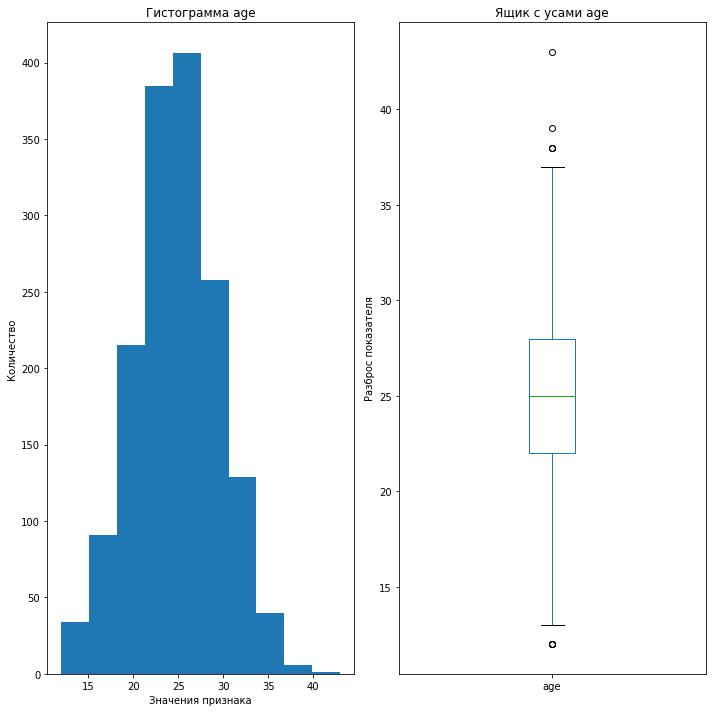

In [7]:
hist_and_box_numeric(users_go_data.drop(['user_id'], axis=1))

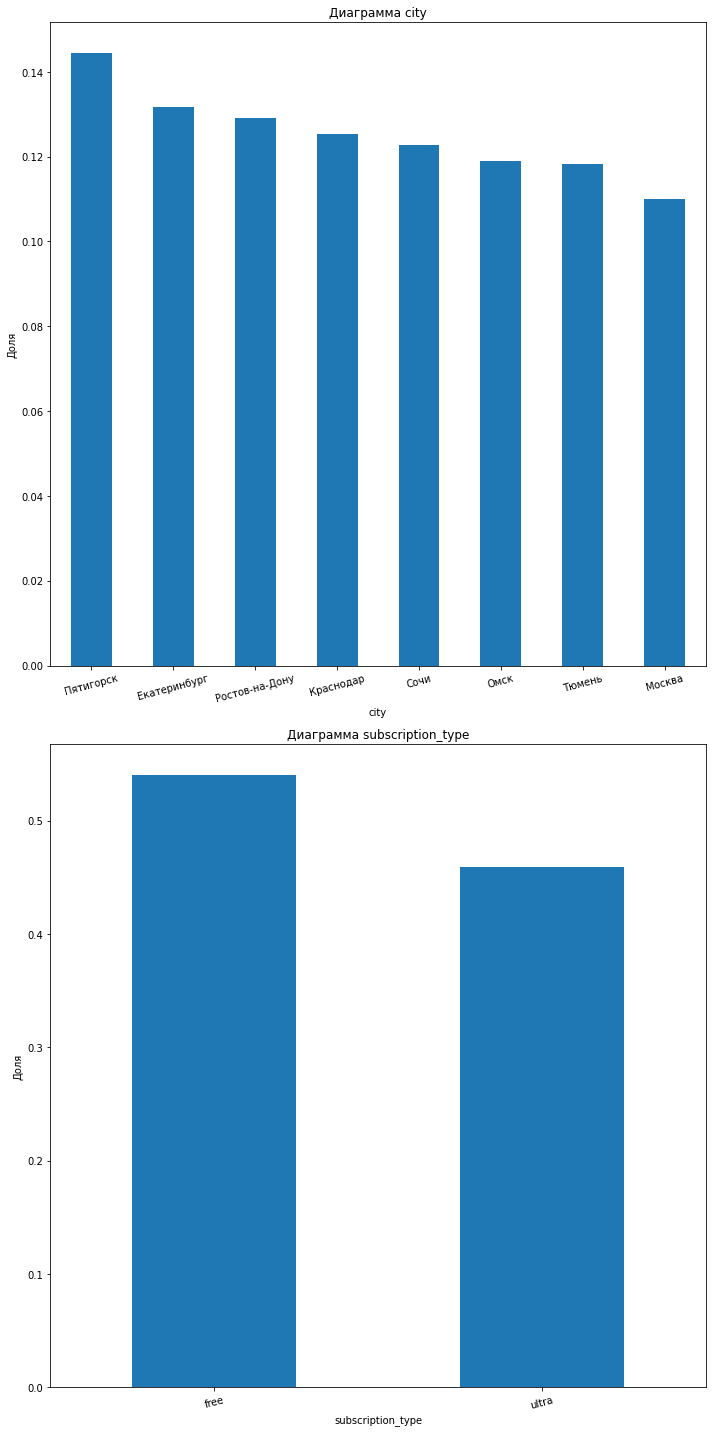

In [8]:
hist_and_box_obj(users_go_data.drop(['user_id', 'name'], axis=1))

* Средний возраст чуть больше 25 лет, распределение нормальное;
* Жители 8-ми городов;
* Пользователей с бесплатной подпиской немного больше, чем с тарифом `ultra`.

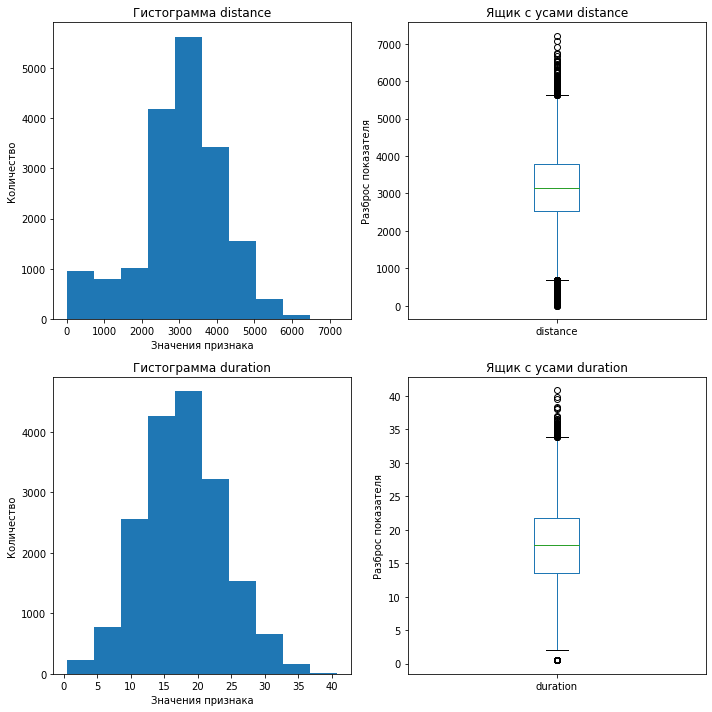

In [9]:
hist_and_box_numeric(rides_go_data.drop(['user_id', 'date'], axis=1))

**Общий вывод:**    
* Средний возраст чуть больше 25 лет, распределение нормальное;
* Жители 8-ми городов;
* Пользователей с бесплатной подпиской немного больше, чем с тарифом `ultra`;
* В среднем пользователи проезжают порядка 3200 метров;
* В среднем на поездку уходит 18 минут.

<a id="10"></a>
## [Предобработка данных](#3.1)

Ранее пропусков обнаружено не было, поэтому проверим дубликаты.

<a id="11"></a>
### Дубликаты

In [10]:
print("Количество явных дубликатов в users_go_data:", users_go_data.duplicated().sum())
print("Количество явных дубликатов в rides_go_data:", rides_go_data.duplicated().sum())

Количество явных дубликатов в users_go_data: 31
Количество явных дубликатов в rides_go_data: 0


In [11]:
users_go_data.drop_duplicates(inplace=True)
print("Количество явных дубликатов в users_go_data:", users_go_data.duplicated().sum())

Количество явных дубликатов в users_go_data: 0


In [12]:
users_go_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Проверим неявные дубликаты, например по имени, возрасту и городу.

In [13]:
users_go_data[users_go_data.duplicated(['name', 'age', 'city'], keep='last')].sort_values(by='name').head(10)

,user_id,name,age,city,subscription_type
378,379,Айдар,27,Ростов-на-Дону,ultra
423,424,Александр,28,Омск,ultra
1030,1031,Александра,24,Ростов-на-Дону,free
233,234,Ангелина,25,Омск,ultra
208,209,Андрей,23,Омск,ultra
210,211,Анжелика,30,Екатеринбург,ultra
729,730,Анна,28,Омск,free
931,932,Антон,25,Сочи,free
332,333,Арина,21,Ростов-на-Дону,ultra
1044,1045,Артемий,28,Ростов-на-Дону,free


In [14]:
users_go_data.query("name == 'Ян' and age == 21 and city == 'Пятигорск'")

,user_id,name,age,city,subscription_type
8,9,Ян,21,Пятигорск,ultra
1220,1221,Ян,21,Пятигорск,free


In [15]:
users_go_data[users_go_data.duplicated(['user_id'], keep='last')]

,user_id,name,age,city,subscription_type


Дубликатов по айдишникам нет, поскольку у меня есть только имя, то предпологаю, что это разные люди с одинаковыми именами, возрастом и городом, но разными тарифами.

Добавим столбцец с месяцем для более удобного анеализа.

In [16]:
rides_go_data['month'] = rides_go_data['date'].dt.month
rides_go_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


<a id="12"></a>
### [Аномалии](#3.1)

In [17]:
short_describe(users_go_data.drop(['user_id'], axis=1))

,std,min,50%,max
age,4.572367,12.0,25.0,43.0


In [18]:
short_describe(rides_go_data.drop(['user_id'], axis=1))

,std,min,50%,max
distance,1116.831209,0.855683,3133.609994,7211.007745
duration,6.091051,0.500000,17.678395,40.823963
month,3.437410,1.000000,6.000000,12.000000


Аномалий не обнаружено. Странно, что пользователь проехал 85 см, и в целом атких людей хватает, но бывает - передумал или еще что.

**Вывод:**    
* В датафрейме `users_go_data` обнаруен 31 явный дубликат, удален;
* Неявных дубликатов во фреймах не обнаружено;
* В датафрейм `rides_go_data` добавлен столбец с месяцем поездки.

<a id="13"></a>
## [Исследовательский анализ данных](#3.1)

In [19]:
def research_numeric_data(data, value):
    """Выводим описание столбца числового типа, гистограмму с этим столбцом."""
    print('Описание данных:')
    display(data[value].describe().T)
    print()
    print('Уникальные значения(10 наиболее частых):')
    display(data[value].value_counts(ascending=False).head(10))
    print()
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

    data[value].plot(
        ax=axes[0], kind="hist", rot=0);
    axes[0].set_title(f"Гистограмма {value}")
    axes[0].set_ylabel('Количество')
    axes[0].set_xlabel(f'Значения признака {value}')
    data[value].plot(
        ax=axes[1], kind="box", xlabel=value, rot=0);
    axes[1].set_title(f'Ящик с усами {value}')
    fig.tight_layout()

    
def research_object_data(data, value):
    """Выводим описание столбца категориального типа, график с этим столбцом."""
    print('Уникальные значения:')
    display(data[value].value_counts(ascending=False))
    print()
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 7))
    
    data[value].value_counts().plot(
        ax=axes[0],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45,
        title = f'Линейчатый график для показателя: {value}'
    )
    
    data[value].value_counts().plot(
        ax=axes[1],
        kind = 'pie',
        autopct = '%1.0f%%',
        figsize=(12,12), 
        title = f'Распределение по признаку: {value}')
    fig.tight_layout()
    ;

def research_numeric_data_with_target(data, value, target):
    """
    Распределение числового признака в зависимости от целевого.
    Наложенные диаграммы и два боксплота.
    """
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
    
    unique_target = data[target].unique()
    
    data[data[target] == unique_target[0]][value].plot(
        ax=axes[0], kind="hist", rot=0, color="r", label=unique_target[0], alpha=0.5)
    data[data[target] == unique_target[1]][value].plot(
        ax=axes[0], kind="hist", rot=0, color="g", label=unique_target[1], alpha=0.5)
    axes[0].set_title('Гистограммы с целевым признаком')
    axes[0].set_ylabel('Количество')
    axes[0].legend()
    axes[0].set_xlabel(f'Значения признака {value}')
    
    data[data[target] == unique_target[0]][value].plot(
        ax=axes[1], kind="box", xlabel=value, rot=0);
    axes[1].set_title(f'Боксплот с целевым признаком {unique_target[0]}')
    
    data[data[target] == unique_target[1]][value].plot(
        ax=axes[2], kind="box", xlabel=value, rot=0);
    axes[2].set_title(f'Боксплот с целевым признаком {unique_target[1]}')
    fig.tight_layout()

def research_object_data_with_target(data, value, target):
    """
    Распределение категориального признака в зависимости от целевого.
    Две диаграммы.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    
    unique_target = data[target].unique()
    
    data[data[target] == unique_target[0]][value].value_counts().plot(
        ax=axes[0],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45, color="r");
    axes[0].set_title(f'График для показателя: {value} c признаком {unique_target[0]}')

    data[data[target] == unique_target[1]][value].value_counts().plot(
        ax=axes[1],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45, color="g");
    axes[1].set_title(f'График для показателя: {value} c признаком {unique_target[1]}')
    fig.tight_layout()
    

<a id=14></a>
### [Данные `users_go.csv`](#3.1)

Описание данных:


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


Уникальные значения(10 наиболее частых):


25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
Name: age, dtype: int64

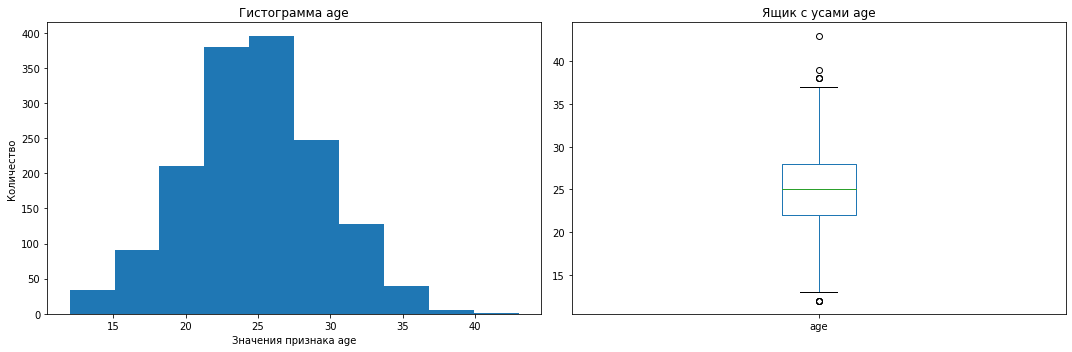

In [20]:
research_numeric_data(users_go_data, 'age')

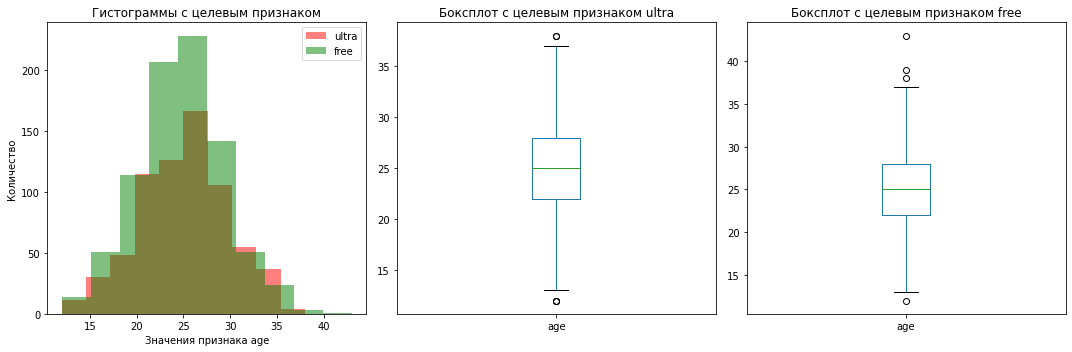

In [21]:
research_numeric_data_with_target(users_go_data, 'age', 'subscription_type')

Уникальные значения:


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

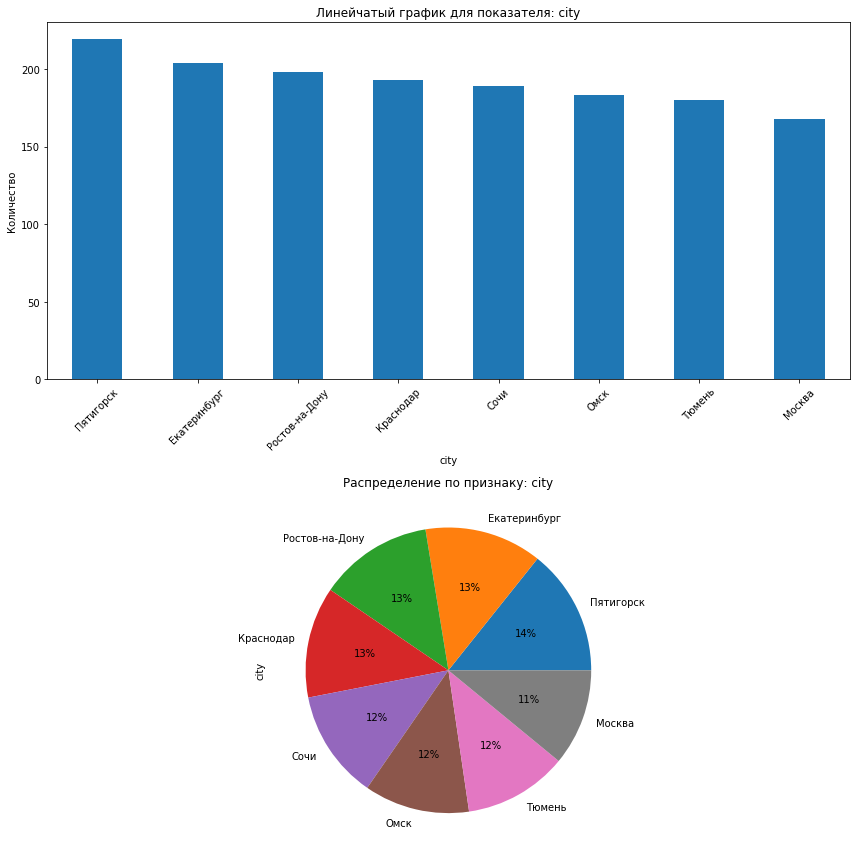

In [22]:
research_object_data(users_go_data, 'city')

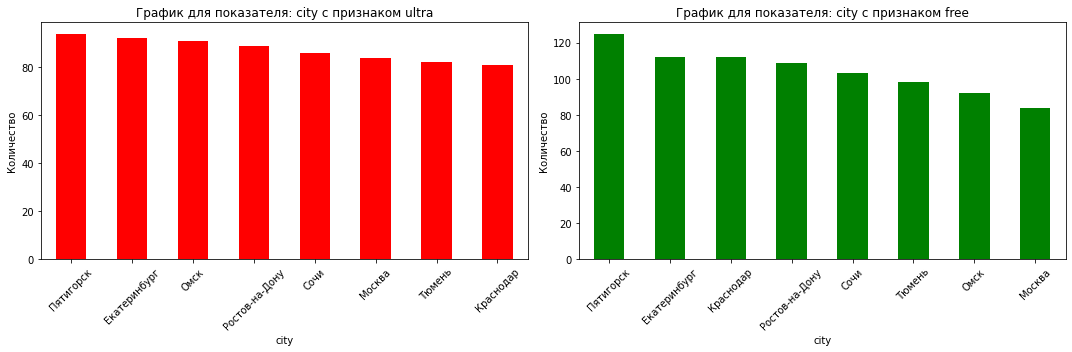

In [23]:
research_object_data_with_target(users_go_data, 'city', 'subscription_type')

Уникальные значения:


free     835
ultra    699
Name: subscription_type, dtype: int64

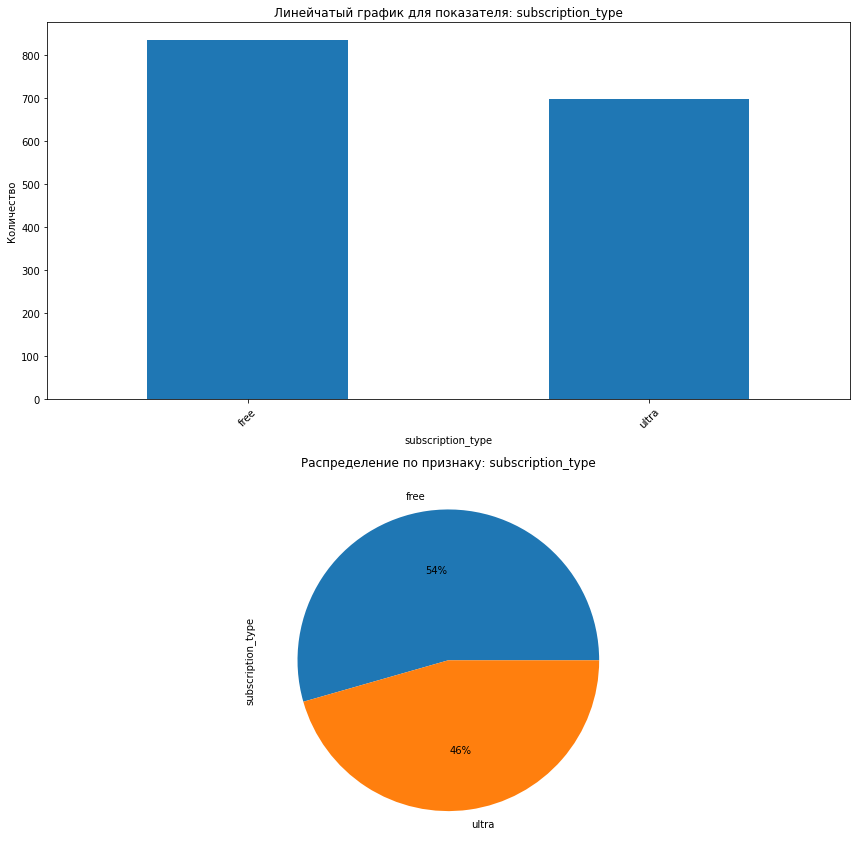

In [24]:
research_object_data(users_go_data, 'subscription_type')

**Вывод:**    
* Средний возраст пользователя 25 лет;
* Минимальный возраст 12 лет, максимальный 43 года;
* Данные о пользователях 8 городов: `Тюмень`, `Омск`, `Москва`, `Ростов-на-Дону`, `Краснодар`, `Пятигорск`, `Екатеринбург`, `Сочи`;
* Больше всего жителей Пятигорска, меньше всего жителей Москвы;
* Касательно тарифов: 54% используют бесплатный тариф, 46% - тариф `ultra`.

<a id=15></a>
### [Данные `rides_go.csv`](#3.1)

Описание данных:


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


Уникальные значения(10 наиболее частых):


741.545359     1
4158.226381    1
3672.118870    1
4533.004089    1
2437.274120    1
3053.957201    1
3283.984975    1
3746.984964    1
3336.681167    1
2536.902564    1
Name: distance, dtype: int64

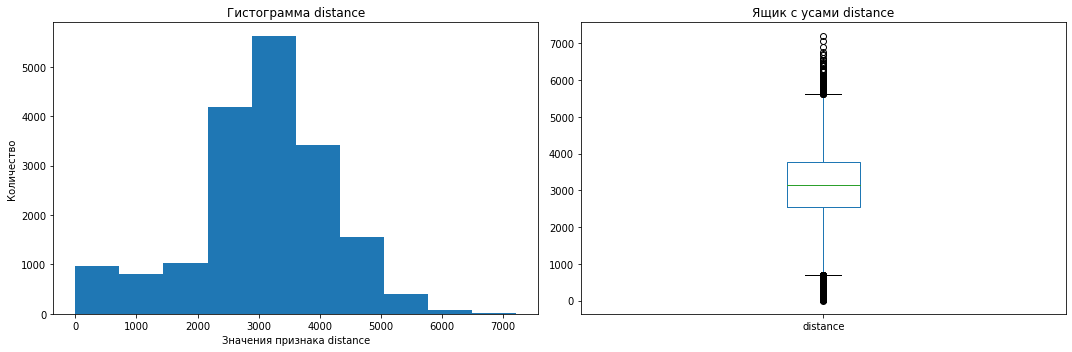

In [25]:
research_numeric_data(rides_go_data, 'distance')

Описание данных:


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


Уникальные значения(10 наиболее частых):


0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
20.250429     1
24.551830     1
17.798679     1
8.525481      1
20.769748     1
Name: duration, dtype: int64

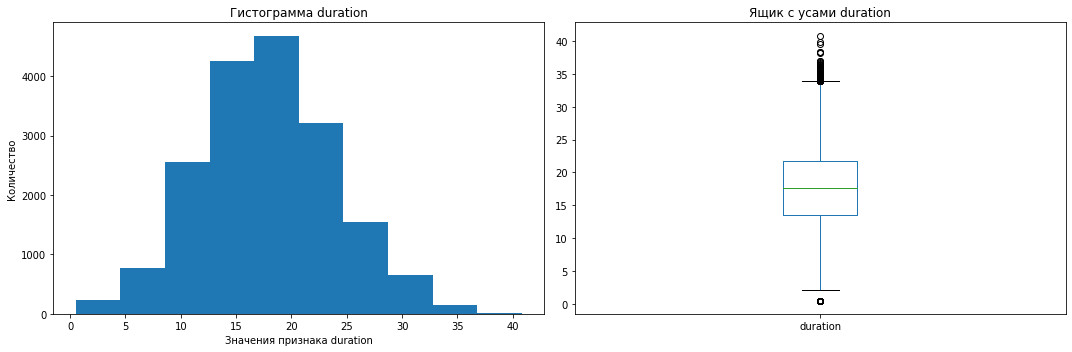

In [26]:
research_numeric_data(rides_go_data, 'duration')

Описание данных:


count    18068.000000
mean         6.486772
std          3.437410
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64


Уникальные значения(10 наиболее частых):


1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
Name: month, dtype: int64

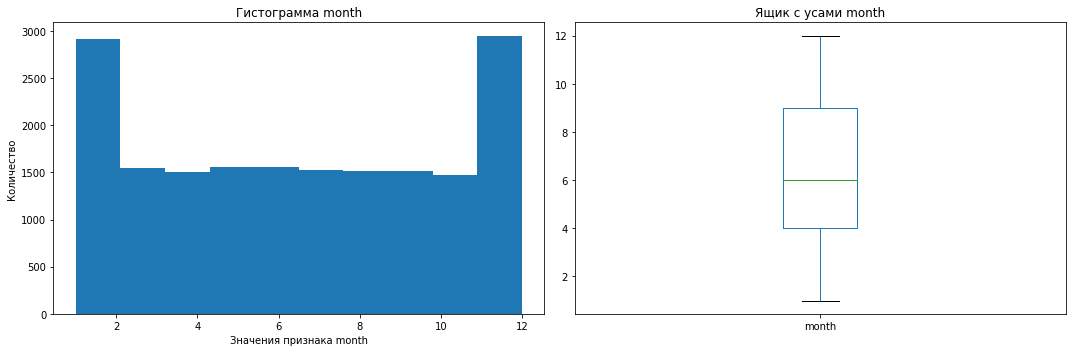

In [27]:
research_numeric_data(rides_go_data, 'month')

In [28]:
rides_go_data['date'].describe(datetime_is_numeric=True)

count                            18068
mean     2021-06-30 19:47:21.266327296
min                2021-01-01 00:00:00
25%                2021-04-02 00:00:00
50%                2021-06-30 00:00:00
75%                2021-09-28 00:00:00
max                2021-12-30 00:00:00
Name: date, dtype: object

In [29]:
print('Уникальные значения(10 наиболее частых):')
display(rides_go_data['date'].value_counts(ascending=False).head(10))

Уникальные значения(10 наиболее частых):


2021-12-22    72
2021-01-12    70
2021-12-27    69
2021-08-20    67
2021-06-09    67
2021-05-17    65
2021-01-24    64
2021-06-18    63
2021-05-22    63
2021-09-14    63
Name: date, dtype: int64

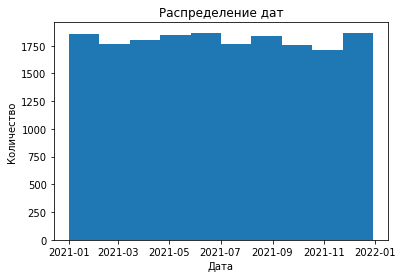

In [30]:
plt.hist(rides_go_data['date'])
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.title('Распределение дат')
plt.show()

**Вывод:**    
* Среднее расстояние, которое преодолевает пользователь - 3 км.;
* Максимальное расстояние 7.2 км. Много значений до метра, что вероятно говорит о попытке впервые воспользоваться данной услугой;
* В среднем самокат используют около 18 мин, максимально использовали 40 мин., так же стандартное отклонение порядка 6 мин;
* Присутствуют 95 значений, при которых самокатом пользовались буквально полминуты;
* Выгрузка за один год - с 1-го января 2021 года по 30-е декабря 2021 года.

<a id=17></a>
## [Объединение данных](#3.1)

Объединим данные в один фрейм для дальнейших расчетов.

In [31]:
all_data = users_go_data.merge(rides_go_data)
all_data = all_data.merge(subsc_go_data)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [32]:
all_data.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


<a id=18></a>
### [Пользователи без подписки](#3.1)

In [33]:
free_subsc = all_data[all_data['subscription_type'] == 'free']
free_subsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


Визуализируем информацию о расстоянии и времени поездок.

Описание данных:


count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


Уникальные значения(10 наиболее частых):


3810.963359    1
2184.802657    1
2909.730804    1
3771.642779    1
2879.222022    1
1291.517771    1
4324.895610    1
2781.547095    1
790.086135     1
3625.545257    1
Name: distance, dtype: int64

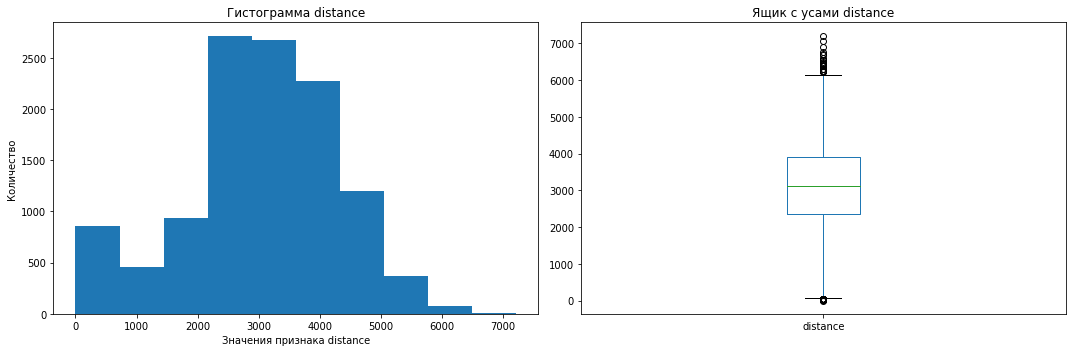

In [34]:
research_numeric_data(free_subsc, 'distance')

Описание данных:


count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


Уникальные значения(10 наиболее частых):


0.500000     95
20.783193     1
10.262798     1
17.522416     1
31.122065     1
14.806521     1
7.475756      1
16.862418     1
29.270721     1
20.852663     1
Name: duration, dtype: int64

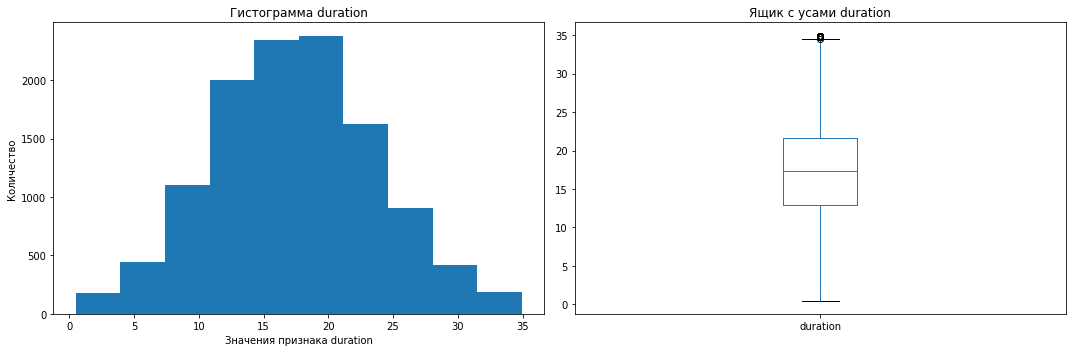

In [35]:
research_numeric_data(free_subsc, 'duration')

<a id=19></a>
### [Пользователи c подпиской](#3.1)

In [36]:
ultra_subsc = all_data[all_data['subscription_type'] == 'ultra']
ultra_subsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


Визуализируем информацию о расстоянии и времени поездок.

Описание данных:


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


Уникальные значения(10 наиболее частых):


3533.653613    1
1148.018216    1
2482.085805    1
3442.376310    1
2841.971978    1
3980.896617    1
2752.309343    1
3486.849534    1
5121.490903    1
1154.726174    1
Name: distance, dtype: int64

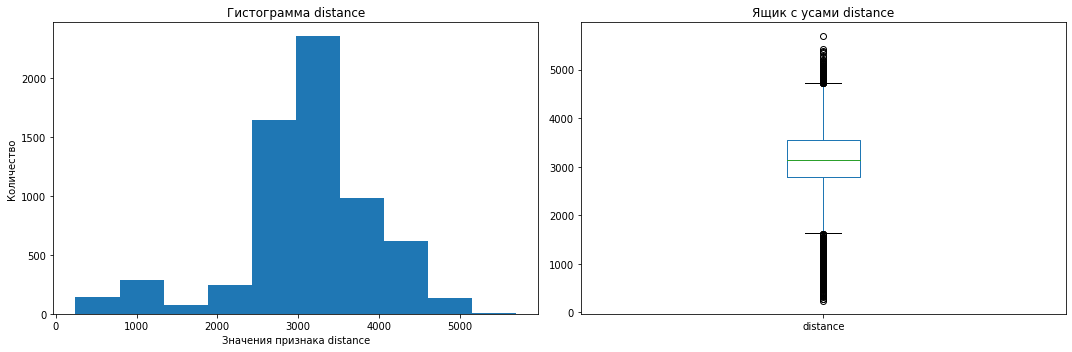

In [37]:
research_numeric_data(ultra_subsc, 'distance')

Описание данных:


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


Уникальные значения(10 наиболее частых):


28.647447    1
25.217665    1
24.152530    1
20.189589    1
19.775185    1
15.431545    1
11.456210    1
20.856154    1
16.208568    1
13.631395    1
Name: duration, dtype: int64

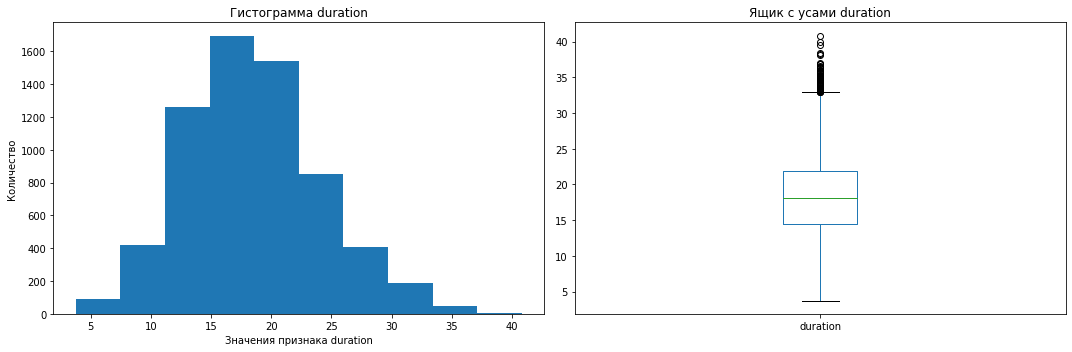

In [38]:
research_numeric_data(ultra_subsc, 'duration')

**Вывод:**    
* Пользователей с бесплатным тарифом больше, но среднее расстояние примерно одинаково;
* Максимальное расстояние и 3-й квантиль так же больше у пользователей бесплатного тарифа;
* По времени поездки у пользователей обоих тарифов среднее время примерно одинаково;
* Максимальное время пользования у пользователей  старифом `ultra` больше.

<a id=20></a>
## [Подсчёт выручки](#3.1)

Создаем датафрейм с агрегированными данными о поездках на основе объединенного датафрейма, найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [39]:
data_for_revenue = pd.pivot_table(
    all_data,
    index=['month', 'user_id'],
    values = ['distance', 'duration', 'name', 'subscription_type'],
    aggfunc = {'distance': sum, 
               'duration' : sum,
               'name': 'count',
               'subscription_type': min})
# Переименуем столбец с количеством поездок, и округляем в большую сторону.
data_for_revenue = data_for_revenue.rename(columns={'name': 'count_travels'})
data_for_revenue['duration'] = data_for_revenue['duration'].apply(np.ceil)

data_for_revenue.head(10)

distance  duration  count_travels subscription_type
month user_id                                                        
1     1        7027.511294      42.0              2             ultra
      3        3061.777147      13.0              1             ultra
      5        3914.646990      13.0              1             ultra
      7        6478.080979      28.0              2             ultra
      12       3577.151148      33.0              1             ultra
      13       6687.987446      42.0              2             ultra
      14       7699.643820      34.0              2             ultra
      15       4187.621459      39.0              1             ultra
      20       3516.719208      29.0              1             ultra
      22       3058.692225      13.0              1             ultra

Теперь добавим во фрейм столбец с выручкой.

In [40]:
FREE_SUBSC = 0
ULTRA_SUBSC = 199

FREE_COST_MINUTE = 8
ULTRA_COST_MINUTE = 6

FREE_COST_START = 50
ULTRA_COST_START = 0

def calculate_revenue(row):
    """
    Добавляет стоимость помесячную выручку, рассчитываю по формуле:
    (стоимость старта поездки × количество поездок) + 
    (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах)
    + стоимость подписки
    """
    if row['subscription_type'] == 'free':
        return FREE_COST_START*row['count_travels'] + FREE_COST_MINUTE*row['duration'] + FREE_SUBSC
    elif row['subscription_type'] == 'ultra':
        return ULTRA_COST_START*row['count_travels'] + ULTRA_COST_MINUTE*row['duration'] + ULTRA_SUBSC
    else:
        return 'Not subc type'

In [41]:
data_for_revenue['revenue_per_month'] = data_for_revenue.apply(calculate_revenue, axis=1)
data_for_revenue.head(10)

distance  duration  count_travels subscription_type  \
month user_id                                                           
1     1        7027.511294      42.0              2             ultra   
      3        3061.777147      13.0              1             ultra   
      5        3914.646990      13.0              1             ultra   
      7        6478.080979      28.0              2             ultra   
      12       3577.151148      33.0              1             ultra   
      13       6687.987446      42.0              2             ultra   
      14       7699.643820      34.0              2             ultra   
      15       4187.621459      39.0              1             ultra   
      20       3516.719208      29.0              1             ultra   
      22       3058.692225      13.0              1             ultra   

               revenue_per_month  
month user_id                     
1     1                    451.0  
      3                    277.0  
      5                    277.0  
      7                    367.0  
      12                   397.0  
      13                   451.0  
      14                   403.0  
      15                   433.0  
      20                   373.0  
      22                   277.0

In [42]:
data_for_revenue.query('user_id == 1')

,,distance,duration,count_travels,subscription_type,revenue_per_month
month,user_id,,,,,
1,1,7027.511294,42.0,2,ultra,451.0
4,1,754.159807,7.0,1,ultra,241.0
8,1,6723.470560,45.0,2,ultra,469.0
10,1,5809.911100,32.0,2,ultra,391.0
11,1,7003.499363,54.0,3,ultra,523.0
12,1,6751.629942,28.0,2,ultra,367.0


In [43]:
data_for_revenue['revenue_per_month'].describe()

count    11331.000000
mean       340.100344
std        151.127485
min         58.000000
25%        234.000000
50%        319.000000
75%        412.000000
max       1428.000000
Name: revenue_per_month, dtype: float64

In [44]:
print('Суммарная выручка составила:', data_for_revenue['revenue_per_month'].sum())

Суммарная выручка составила: 3853677.0


**Вывод:**    
* Минимальная выручка с клиента составляет 58 руб.;
* Максимальная выручка с клиента за всё время 1428 руб.;
* Средняя выручка с клиента порядка 340 руб.;
* Суммарная выручка составила: 3 853 677 руб.;
* По значениям квантилей, можно сделать вывод, что большая часть клинетов приносить в месяц примерно 412 рублей.

<a id=21></a>
## [Проверка гипотез](#3.1)

<a id=22></a>
### [Пользователи с подпиской тратят больше времени на поездки](#3.1)

Сформулирую нулевую и альтернативную гипотезы:    
* $H_0$: длительность(`duration`) поездки пользователей с тарифом `ultra` равна(=) длительности(`duration`) поездки пользователей с тарифом `free`.    

* $H_1$: длительность(`duration`) поездки пользователей с тарифом `ultra` больше(>) длительности(`duration`) поездки пользователей с тарифом `free`.    

Для оценки статистической значимости буду использовать двухвыборочный t-тест для двух независимых выборок, с правосторонней альтернативной гипотезой.

In [45]:
# Уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    ultra_subsc['duration'],
    free_subsc['duration'],
    alternative='greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


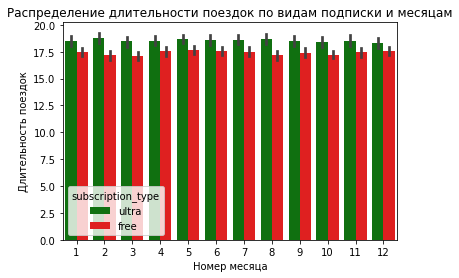

In [46]:
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = all_data,
            palette = ['green', 'red'])
ax.set_title('Распределение длительности поездок по видам подписки и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Длительность поездок');

**Вывод:**    
Отвергли гипотезу о том, что длительность поездки пользователей с тарифом `ultra` равна длительности пользователей с терифом `free`. Могу предполагать, что она больше, что в целом подтверждает график распределения длительностей поездок по месяцам.

<a id=23></a>
### [Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров](#3.1)

Сформулирую нулевую и альтернативную гипотезы:    
* $H_0$: расстояние(`distance`) поездки пользователей с тарифом `ultra` равна(=) 3130 м..    

* $H_1$: расстояние(`distance`) поездки пользователей с тарифом `ultra` меньше(<) 3130 м..    

Для оценки статистической значимости буду использовать одновыборочный t-тест, с левосторонней альтернативной гипотезой.

In [47]:
# Уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(
    ultra_subsc['distance'],
    3130,
    alternative='less'
)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-value: 0.08046311521502146
Не удалось отвергнуть нулевую гипотезу.


In [48]:
ultra_subsc['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

**Вывод:**    
По итогам проверки не могу утверждать, что среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 м.

<a id=24></a>
### [Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#3.1)

Сформулирую нулевую и альтернативную гипотезы:    
* $H_0$: помесячная выручка(`revenue_per_month`) пользователей с тарифом `ultra` равна(=) помесячной выручки(`revenue_per_month`) пользователей с тарифом `free`.    

* $H_1$: помесячная выручка(`revenue_per_month`) пользователей с тарифом `ultra` больше(>) помесячной выручки(`revenue_per_month`) пользователей с тарифом `free`.    

Для оценки статистической значимости буду использовать двухвыборочный t-тест для независимых выборок, с правосторонней альтернативной гипотезой.

In [49]:
# Уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    data_for_revenue.loc[data_for_revenue.subscription_type == 'ultra', 'revenue_per_month'],
    data_for_revenue.loc[data_for_revenue.subscription_type == 'free', 'revenue_per_month'],
    alternative='greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу.


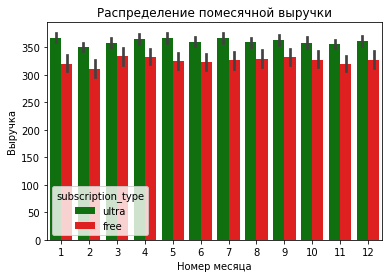

In [50]:
ax = sns.barplot(x = 'month',
            y = 'revenue_per_month',
            hue = "subscription_type",
            data = data_for_revenue.reset_index(),
            palette = ['green', 'red'])
ax.set_title('Распределение помесячной выручки')
ax.set(xlabel='Номер месяца', ylabel='Выручка');

**Вывод:**    
Отвергли гипотезу о том, что ежемесячная выручка от пользователей тарифа `ultra` равно выручке от пользователей тарифа `free`. Могу предполагать, что она действительно выше выручки пользователей от тарифа `free`.

<a id=25></a>
### [Количество обращений в техподдержку значимо снизилось(теоретическая)](#3.1)

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Сформулирую нулевую и альтернативную гипотезы:    
* $H_0$: количество обращений после обновления равно(=) количества обращений до обновления.    

* $H_1$: количество обращений после обновления меньше(<) количества обращений до обновления.    

Для оценки статистической значимости буду использовать двухвыборочный t-тест для зависимых выборок, с левосторонней альтернативной гипотезой(метод `ttest_rel`).

**Вывод:**    
* Отвергли гипотезу о том, что длительность поездки пользователей с тарифом `ultra` равна длительности пользователей с терифом `free`. Могу предполагать, что она больше, что в целом подтверждает график распределения длительностей поездок по месяцам;
* По итогам проверки не могу утверждать, что среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 м.
* Отвергли гипотезу о том, что ежемесячная выручка от пользователей тарифа `ultra` равно выручке от пользователей тарифа `free`. Могу предполагать, что она действительно выше выручки пользователей от тарифа `free`.

<a id=26></a>
## [Распределения](#3.1)

<a id=27></a>
### [Акция с раздачей промокодов на один бесплатный месяц подписки](#3.1)

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
    
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При раздаче промокодов в количестве 1161 вероятность, не выполнить план меньше 5.0 %


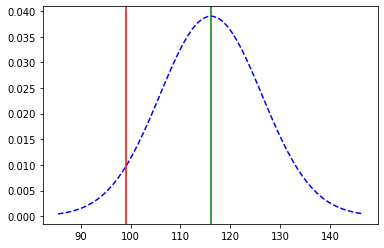

In [51]:
n = 1000  # фиксированное число попыток
p = 0.1  # вероятность успеха
k = 99  # количество успехов
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 3 * sigma),(mu + 3 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b--')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

**Вывод:**    
Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью 5% не выполнить план.

<a id=28></a>
### [Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей](#3.1)

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия сообщений: 0.15371708296369768


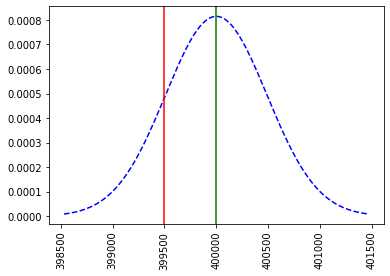

In [52]:
# параметры биномиального распределения
n = 1000000
p = 0.4
k = 399500
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений:', result)

arange = np.arange((mu - 3 * sigma),(mu + 3 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b--')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

**Вывод:**    
Если разослать 1 млн уведомлений (откроют только 40 % получивших клиентов), тогда вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 0.1537 или 15,37 %.

# Общий вывод и рекомендации заказчику

В рамках выполнения проекта мне было необходимо:    
Проанализировать данные, посчитать выручку и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании;
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него;
5. Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подобрать параметры распределения, описывающего эту ситуацию, построить график распределения и сформулировать ответ на вопрос о количестве промокодов.
6. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.    

По предобработке:    
* В датафрейме `users_go_data` обнаруен 31 явный дубликат, удален;
* Неявных дубликатов во фреймах не обнаружено;
* В датафрейм `rides_go_data` добавлен столбец с месяцем поездки.    

В ходе исследовательского анализа было установлено:   
* Среднее расстояние, которое преодолевает пользователь - 3 км.;
* Максимальное расстояние 7.2 км. Много значений до метра, что вероятно говорит о попытке впервые воспользоваться данной услугой;
* В среднем самокат используют около 18 мин, максимально использовали 40 мин., так же стандартное отклонение порядка 6 мин;
* Присутствуют 95 значений, при которых самокатом пользовались буквально полминуты;
* Выгрузка за один год - с 1-го января 2021 года по 30-е декабря 2021 года.    

Касательно расчета и анализа выручки:
* Создан новый фрейм с выручкой `revenue_per_month`;
* Минимальная выручка с клиента составляет 58 руб.;
* Максимальная выручка с клиента за всё время 1428 руб.;
* Средняя выручка с клиента порядка 340 руб.;
* Суммарная выручка составила: 3 853 677 руб.;
* По значениям квантилей, можно сделать вывод, что большая часть клинетов приносить в месяц примерно 412 рублей.    

Касательно проверок гипотез:
* Отвергли гипотезу о том, что длительность поездки пользователей с тарифом `ultra` равна длительности пользователей с терифом `free`. Могу предполагать, что она больше, что в целом подтверждает график распределения длительностей поездок по месяцам;
* По итогам проверки не могу утверждать, что среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 м.
* Отвергли гипотезу о том, что ежемесячная выручка от пользователей тарифа `ultra` равно выручке от пользователей тарифа `free`. Могу предполагать, что она действительно выше выручки пользователей от тарифа `free`.    

Касательно проверок распределений:
* Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью 5% не выполнить план;
* Если разослать 1 млн уведомлений (откроют только 40 % получивших клиентов), тогда вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 0.1537 или 15,37 %.